<a href="https://colab.research.google.com/github/sinhasurapto/Shell_AI_GHG_Emission_Prediction/blob/main/GHGEmissionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# Load dataset
excel_file = '/content/SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'

In [3]:
# Years in the dataset
years = range(2010, 2017)

In [4]:
# 2010
years[0]

2010

In [5]:
# Extract the detail commodity data of 2010
df_2010_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_2010_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [6]:
# Extract the detail industry data of 2010
df_2010_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2010_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [7]:
# To store the combined data
all_data = []

# To access yearwise data
for year in years:
    try:
        # Load yearwise detail commodity and detail industry data
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

        # Create a new column 'Source'
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year

        # Remove unncecessary space from column names
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        # Rename columns in the commodity dataframe
        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)

        # Rename columns in the industry dataframe
        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)

        # Combine the dataframes using concatenation
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))

    # Exception handling
    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [8]:
# Yearwise data combined for 2013
all_data[3]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.373,0.072,0.444,NaN,4,3,1,4,1,Commodity,2013
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2013
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2013
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,4,1,Commodity,2013
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.722,0.079,0.801,NaN,4,3,1,4,1,Commodity,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.008,0.000,0.008,NaN,4,3,1,5,1,Industry,2013
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2013


In [9]:
# Number of years
len(all_data)

7

In [10]:
# Combine all the dataframes
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [11]:
# Number of records in the dataframe
len(df)

22092

In [12]:
# Columns in the dataframe
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [13]:
# Identify columns with null values
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


In [14]:
# Remove 'Unnamed: 7' column
df.drop('Unnamed: 7', axis=1, inplace=True)
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [15]:
# Information about columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [16]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


Text(0, 0.5, 'Frequency')

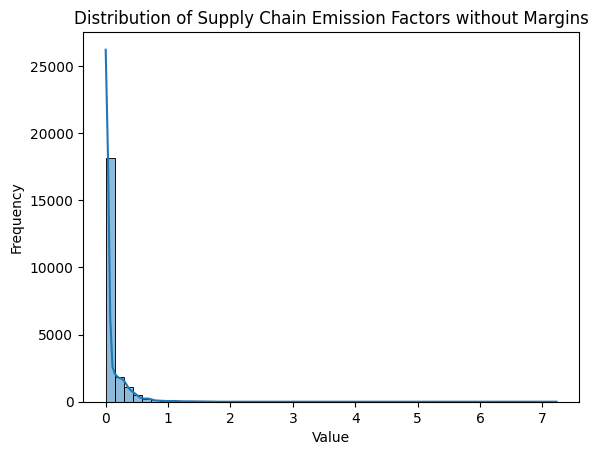

In [17]:
# Target variable distribution
sns.histplot(df['Supply Chain Emission Factors without Margins'], bins=50, kde=True)
plt.title('Distribution of Supply Chain Emission Factors without Margins')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [18]:
# Unique categorical values in 'Substance'
df['Substance'].value_counts()

,count
Substance,
carbon dioxide,5523
methane,5523
nitrous oxide,5523
other GHGs,5523


In [19]:
# Unique categorical values in 'Unit'
df['Unit'].value_counts()

,count
Unit,
"kg/2018 USD, purchaser price",16569
"kg CO2e/2018 USD, purchaser price",5523


In [20]:
# Unique categorical variables in 'Source'
df['Source'].value_counts()

,count
Source,
Industry,11060
Commodity,11032


In [21]:
# Categorical columns
categorical_columns = ['Substance', 'Unit', 'Source']

In [22]:
# Initialize the One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the encoder
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded,
                          columns=encoder.get_feature_names_out(categorical_columns))

# Applying the encoder
df_ohe = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)
df_ohe

,Code,Name,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Year,Substance_carbon dioxide,Substance_methane,Substance_nitrous oxide,Substance_other GHGs,"Unit_kg CO2e/2018 USD, purchaser price","Unit_kg/2018 USD, purchaser price",Source_Commodity,Source_Industry
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",0.398,0.073,0.470,4,3,1,4,1,2010,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",0.001,0.001,0.002,4,3,1,1,1,2010,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",0.002,0.000,0.002,4,3,1,4,1,2010,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",0.002,0.000,0.002,3,3,1,3,1,2010,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1111B0,"Fresh wheat, corn, rice, and other grains",0.659,0.081,0.740,4,3,1,4,1,2010,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087,813B00,"Civic, social, professional, and similar organ...",0.009,0.000,0.009,4,2,1,5,1,2016,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
22088,814000,Private households,0.000,0.000,0.000,4,2,1,5,1,2016,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
22089,814000,Private households,0.000,0.000,0.000,4,2,1,5,1,2016,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
22090,814000,Private households,0.000,0.000,0.000,4,2,1,5,1,2016,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [23]:
# Updated features in the dataframe
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

In [24]:
# Unique values in 'Code'
df_ohe['Code'].unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [25]:
# Number of unique values in 'Code'
df_ohe['Code'].nunique()

395

In [26]:
# Unique values in 'Name'
df_ohe['Name'].unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [27]:
# Number of unique values in 'Name'
df_ohe['Name'].nunique()

713

In [28]:
# Identify top 10 emitters
top_emitters = df_ohe[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10)

# Resetting index for better plotting
top_emitters = top_emitters.reset_index()
top_emitters

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,1.686179
1,Cement,1.324964
2,"Electric power generation, transmission, and d...",1.220357
3,Electricity,1.016143
4,"Dolls, toys, and games",0.832179
5,Lime and gypsum products,0.816536
6,Lime and gypsum product manufacturing,0.799679
7,Industrial gas manufacturing,0.612929
8,Compressed Gases,0.539679
9,Clothing,0.468714


/tmp/ipython-input-29-2939715166.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


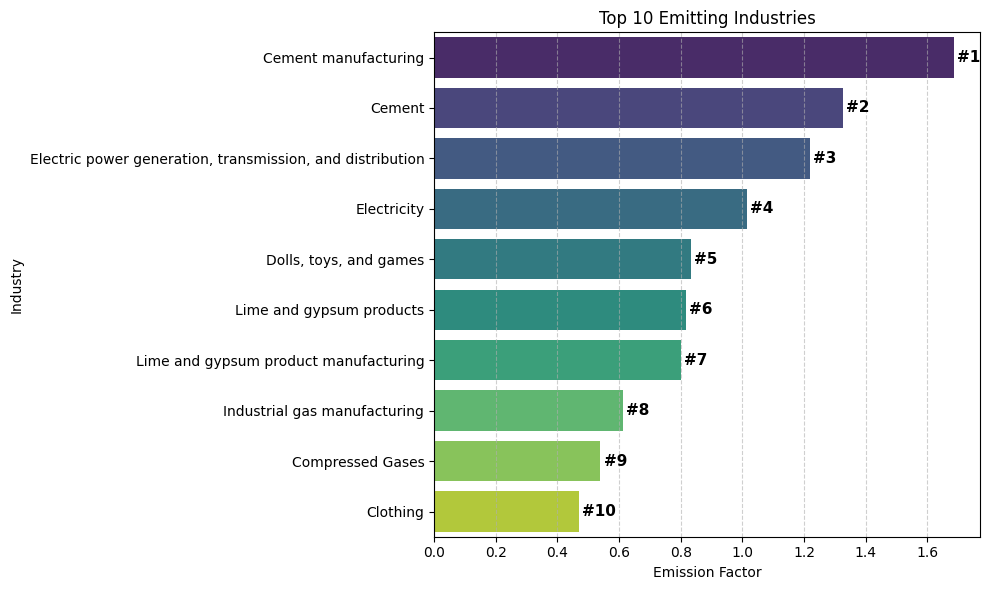

In [29]:
# Plot area
plt.figure(figsize=(10, 6))

# Set up bar plot
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    palette='viridis'
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

# Plot title
plt.title('Top 10 Emitting Industries')

# X-axis label
plt.xlabel('Emission Factor')

# Y-axis label
plt.ylabel('Industry')

# Adding gridlines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust the layout
plt.tight_layout()
plt.show()

In [30]:
# Drop the columns that are not required
df_ohe.drop(['Code', 'Name', 'Year'], inplace=True, axis=1)
df_ohe.columns

Index(['Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins',
       'Substance_carbon dioxide', 'Substance_methane',
       'Substance_nitrous oxide', 'Substance_other GHGs',
       'Unit_kg CO2e/2018 USD, purchaser price',
       'Unit_kg/2018 USD, purchaser price', 'Source_Commodity',
       'Source_Industry'],
      dtype='object')

In [31]:
# Dimensions of updated dataframe
df_ohe.shape

(22092, 16)

In [32]:
# Input and output data
x = df_ohe.drop('Supply Chain Emission Factors without Margins', axis=1)
y = df_ohe['Supply Chain Emission Factors without Margins']

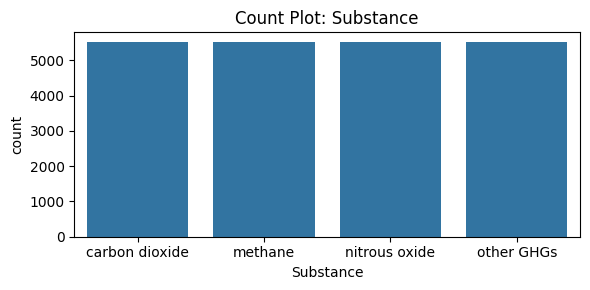

In [33]:
# Count plot for 'Substance'
plt.figure(figsize=(6, 3))
sns.countplot(x=df['Substance'])
plt.title('Count Plot: Substance')
plt.xticks()
plt.tight_layout()
plt.show()

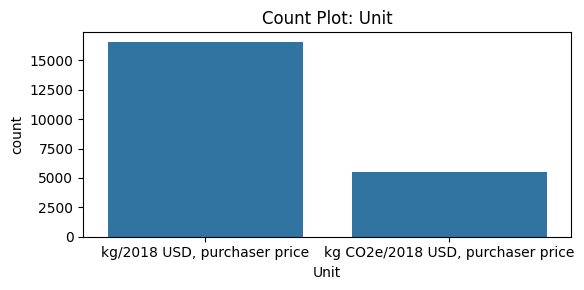

In [34]:
# Count plot for 'Unit'
plt.figure(figsize=(6, 3))
sns.countplot(x=df['Unit'])
plt.title('Count Plot: Unit')
plt.xticks()
plt.tight_layout()
plt.show()

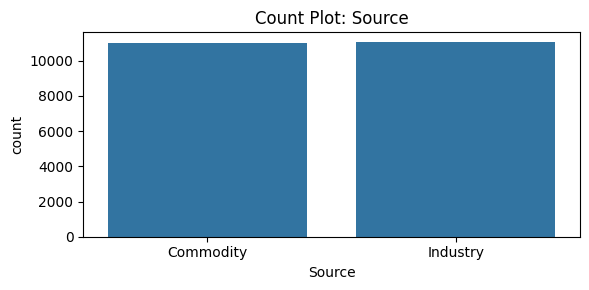

In [35]:
# Count plot for 'Source'
plt.figure(figsize=(6, 3))
sns.countplot(x=df['Source'])
plt.title('Count Plot: Source')
plt.xticks()
plt.tight_layout()
plt.show()

In [36]:
# Correlation
df_ohe.select_dtypes(include=np.number).corr()

,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Substance_carbon dioxide,Substance_methane,Substance_nitrous oxide,Substance_other GHGs,"Unit_kg CO2e/2018 USD, purchaser price","Unit_kg/2018 USD, purchaser price",Source_Commodity,Source_Industry
Supply Chain Emission Factors without Margins,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,5.168835e-01,-1.778726e-01,-1.831515e-01,-1.558594e-01,-1.558594e-01,1.558594e-01,-2.713112e-02,2.713112e-02
Margins of Supply Chain Emission Factors,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,2.810073e-01,-9.240752e-02,-9.429989e-02,-9.429989e-02,-9.429989e-02,9.429989e-02,6.750426e-02,-6.750426e-02
Supply Chain Emission Factors with Margins,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,5.541332e-01,-1.894326e-01,-1.949596e-01,-1.697410e-01,-1.697410e-01,1.697410e-01,-6.687828e-03,6.687828e-03
DQ ReliabilityScore of Factors without Margins,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,-2.433817e-01,2.160777e-01,5.246331e-02,-2.515938e-02,-2.515938e-02,2.515938e-02,1.228726e-02,-1.228726e-02
DQ TemporalCorrelation of Factors without Margins,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-2.179235e-15,-3.694400e-15,-2.164419e-15,-2.624291e-17,-2.624291e-17,-3.758025e-15,-1.908036e-15,-2.909814e-15
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,2.957349e-01,-8.167861e-01,2.340611e-01,2.869901e-01,2.869901e-01,-2.869901e-01,-2.827202e-02,2.827202e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Substance_carbon dioxide,0.516883,0.281007,0.554133,-0.243382,-2.179235e-15,NaN,0.295735,NaN,1.000000e+00,-3.333333e-01,-3.333333e-01,-3.333333e-01,-3.333333e-01,3.333333e-01,-4.263389e-16,4.225873e-16
Substance_methane,-0.177873,-0.092408,-0.189433,0.216078,-3.694400e-15,NaN,-0.816786,NaN,-3.333333e-01,1.000000e+00,-3.333333e-01,-3.333333e-01,-3.333333e-01,3.333333e-01,-5.119723e-16,5.110583e-16


In [37]:
# Information on updated dataframe
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Supply Chain Emission Factors without Margins           22092 non-null  float64
 1   Margins of Supply Chain Emission Factors                22092 non-null  float64
 2   Supply Chain Emission Factors with Margins              22092 non-null  float64
 3   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 4   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 5   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 6   DQ TechnologicalCorrelation of Factors without Margins  22092 non-null  int64  
 7   DQ DataCollection of Factors without Margins            22092 non-null  int64  
 8   Substance_carbon dioxide            

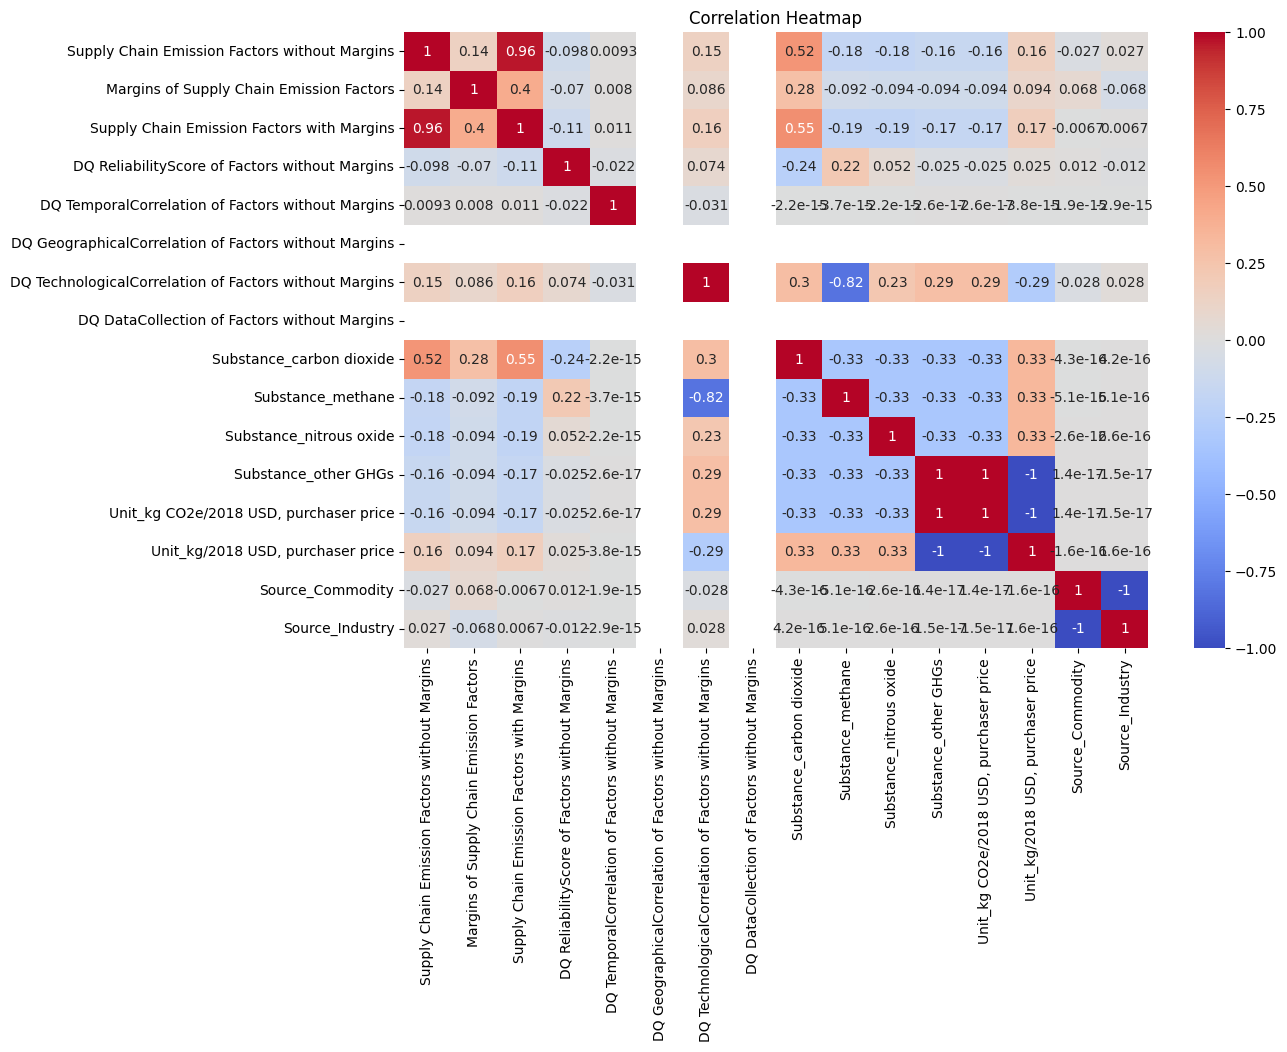

In [38]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_ohe.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()